<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Reverse_Alternating_K_Nodes_(Very_Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reverse Alternating K Nodes

Write a function that takes in the head of a Singly Linked List and a non-zero integer k, reverses alternating groups of `k` nodes in the linked list in place (i.e., doesn't create a brand new list), and returns its new head.

Reversing alternating groups of k nodes means reversing the first k nodes in the list, then not reversing the following k nodes, then reversing the k nodes after that, then not reversing the k nodes after that, and so on and so forth until the tail of the linked list.

Note that the linked list won't necessarily have a total number of nodes that's divisible by k. In other words, the final group of nodes in the linked list might have fewer than k nodes.

Each `LinkedList` node has an integer `value` as well as a `next` node pointing to the next node in the list or to `None` / `null` if it's the tail of the list.

You can assume that the input Linked List will always have at least one node; in other words, the head will never be `None` / `null`.

Sample Input

```
head = 1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8 -> 9 -> 10 -> 11 -> 12 -> 13 -> 14 // the head node with value 1
k = 3
```



Sample Output

```
3 -> 2 -> 1 -> 4 -> 5 -> 6 -> 9 -> 8 -> 7 -> 10 -> 11 -> 12 -> 14 -> 13 // the new head node with value 3
```



In [ ]:
# This is an input class. Do not edit.
class LinkedList:
  def __init__(self, value):
      self.value = value
      self.next = None

  def __str__(self):
    node = self
    output_str = ''
    while node != None:
      output_str = output_str + str(node.value)
      if node.next != None:
        output_str = output_str + ' -> '
      node = node.next
    return output_str

# Time O(n)
# Space O(1)
def reverseAlternatingKNodes(head, k):
    next_head = head
    previous_tail = None
    first_head = None
    while next_head != None:
      head1, tail1, head2, tail2, next_head = get_head_tail_for_interval(next_head, k)
      if next_head != None:
        tail2.next = None
      if tail1 != None:
        tail1.next = None
      head1, tail1 = reverse_linked_list(head1)
      if head2 != None:
        tail1.next = head2
      if previous_tail != None:
        previous_tail.next = head1
      previous_tail = tail2
      if first_head == None:
        first_head = head1
    
    return first_head

def reverse_linked_list(head):
  p1 = None
  p2 = head
  while p2 != None:
    p3 = p2.next
    p2.next = p1
    p1 = p2
    p2 = p3
  return p1, head


def get_head_tail_for_interval(head, k):
  node = head
  tail1, head2, tail2, next_head = None, None, None, None
  idx = 1
  while node != None:
    if idx == k:
      tail1 = node
    if idx == k + 1:
      head2 = node
    if idx == 2 * k:
      tail2 = node
    if idx == (2 * k) + 1:
      next_head = node
      break
    node = node.next
    idx += 1

  return head, tail1, head2, tail2, next_head

In [ ]:
def create_link_list(array):
  head = LinkedList(array[0])
  node = head
  for i in range(1, len(array)):
    node.next = LinkedList(array[i])
    node = node.next
  return head

In [ ]:
head = create_link_list(range(1, 15))
print(head)
k = 3
head = reverseAlternatingKNodes(head, k)
print(head)

1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8 -> 9 -> 10 -> 11 -> 12 -> 13 -> 14
3 -> 2 -> 1 -> 4 -> 5 -> 6 -> 9 -> 8 -> 7 -> 10 -> 11 -> 12 -> 14 -> 13


In [ ]:
head = create_link_list(range(1, 15))
print(head)
k = 1
head = reverseAlternatingKNodes(head, k)
print(head)

1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8 -> 9 -> 10 -> 11 -> 12 -> 13 -> 14
1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8 -> 9 -> 10 -> 11 -> 12 -> 13 -> 14


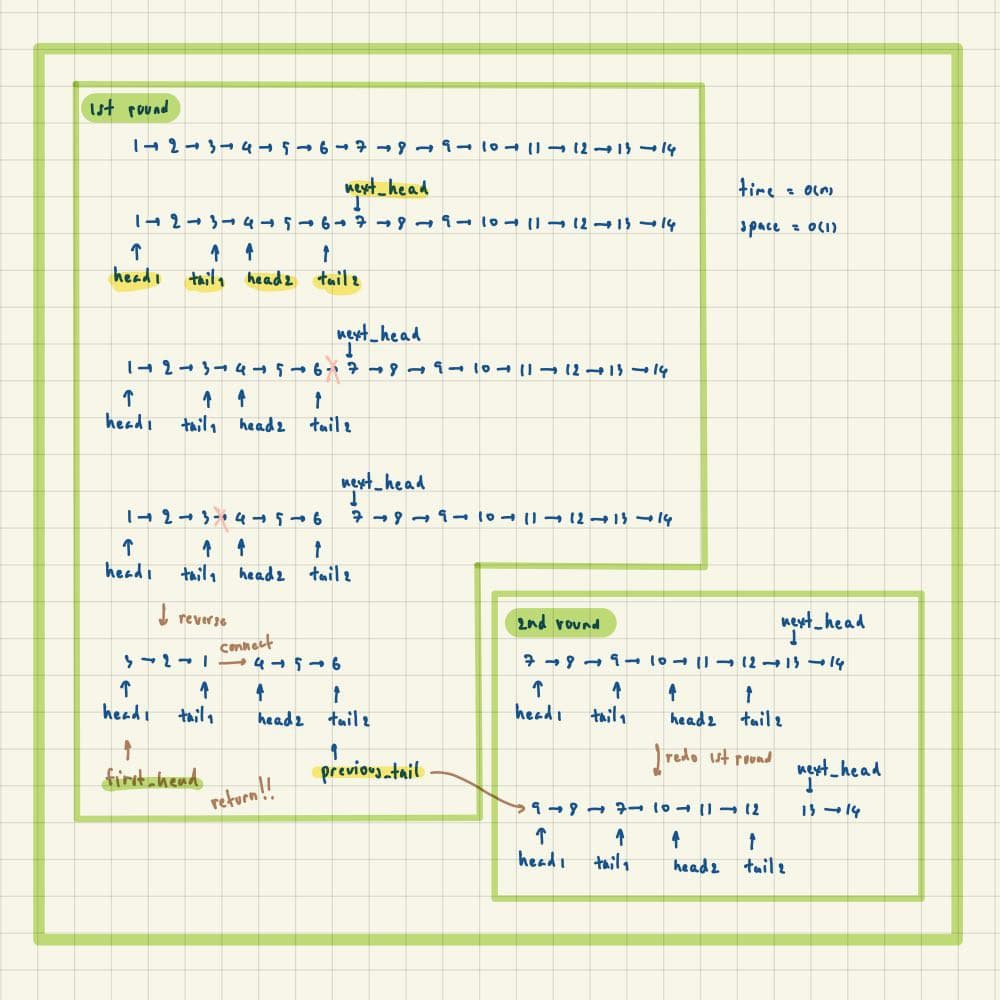